Importing relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk  
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer 
from wordcloud import WordCloud
import re 
import warnings
warnings.simplefilter("ignore")
pd.set_option('display.max_colwidth', 1000)

In [2]:
data=pd.read_csv('total_data.csv')
data.head(2)

,Unnamed: 0,Date,TweetURL,User,Source,Location,Tweet,Likes_Counts,Retweets_Count,Quote_Count,Reply_Count,Candidate
0,0,2023-02-15 23:59:26+00:00,https://twitter.com/Bigkingzz1/status/1626008315091120130,Bigkingzz1,Twitter for iPhone,NaN,"@DEferode @PeterObi You dey shout Jesus, na Jesus tell una to dey sell money give the poor citizens ?\n\n@GodwinIEmefiele this is all your fault. Vote @PeterObi #NigeriaDecides2023",1,0,0,0,Peter Obi
1,1,2023-02-15 23:59:24+00:00,https://twitter.com/thedreamreaper/status/1626008303841976324,thedreamreaper,Twitter for Android,NaN,@Antiok5 @ineclagos @inecnigeria @instablog9ja @NgLabour @PeterObi @PeterPsquare @rudeboypsquare Tagging INEC is a complete waste of time though. Everything now lies on the hands of the people. We must watch them with red eyes.,0,0,0,0,Peter Obi


In [3]:
data.shape

(150000, 12)

### 4. Feature Engineering

Removing Duplicate Tweets

In [4]:
# Identify duplicate tweets in the DataFrame
duplicate_tweets = data[data.duplicated('Tweet')]
print(f'There are {len(duplicate_tweets)} duplicate tweets')

There are 8280 duplicate tweets


In [5]:
data.drop_duplicates(subset='Tweet', inplace=True)

In [6]:
#Checking duplicate tweets dropped
data.shape

(141720, 12)

Selecting Relevant Columns for Sentiment Analysis

In [7]:
new_data=data[['Candidate','Tweet']]
new_data.head()

,Candidate,Tweet
0,Peter Obi,"@DEferode @PeterObi You dey shout Jesus, na Jesus tell una to dey sell money give the poor citizens ?\n\n@GodwinIEmefiele this is all your fault. Vote @PeterObi #NigeriaDecides2023"
1,Peter Obi,@Antiok5 @ineclagos @inecnigeria @instablog9ja @NgLabour @PeterObi @PeterPsquare @rudeboypsquare Tagging INEC is a complete waste of time though. Everything now lies on the hands of the people. We must watch them with red eyes.
2,Peter Obi,"If not for Ethnic Sentiment, i don't think any right thinking man would Support @PeterObi over @officialABAT. Its a Sin Against Humanity."
3,Peter Obi,@Mallam_jabeer @PeterObi Amen 🙏 🙏 🙏
4,Peter Obi,"🇳🇬\n🤔""NOW THE NATIONAL ANTHEM"", &amp; Tinubu raised two hands🙌 haba🙈\n\nBaba Oshio shock 😲 🙄 sotee he shout him down. \n\nMake una leave this man who contested for 25th Jan election &amp; vote family👪LP to take back Nigeria\n@PeterObi\n@officialABAT\n@vanguardngrnews\n@ARISEtv\n@channelstv https://t.co/awOrg4ZXQR"


### 5. Text Preprocessing

In [8]:
def preprocess_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    #convert input text to lower text characters
    text = str(text).lower()
    #remove square brackets 
    text = re.sub('\[.*?\]', '', text)
    #emove URLs (web links) from the input text.
    text = re.sub('https?://\S+|www\.\S+', '', text)
    #remove HTML tags from the input text
    text = re.sub('<.*?>+', '', text)
    #remove newline characters from the input text.
    text = re.sub('\n', '', text)
    #remove alphanumeric words that contain digits from the input text 
    text = re.sub('\w*\d\w*', '', text)
    #is used to remove Twitter handles (usernames) from the input text
    text=re.sub(r'@[A-Za-z0-9]+','',text)
    #is used to remove hashtag symbols from the input text.
    text=re.sub(r'#','',text)
    #emove the "RT" (retweet) indicator and any whitespace characters from input text
    text=re.sub(r'RT[\s]+','',text)
    #remove underscores from text
    text = re.sub('_', ' ', text)
    text=re.sub(r'[^\w]', ' ', text)
    # Remove stop words and lemmatize tokens
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in text.split() if token not in stop_words]
    # Join tokens back into a string
    clean = ' '.join(tokens)
    return clean


In [9]:
# Apply the preprocess_text function to the 'Tweet' column
new_data['preprocessed_tweet'] = new_data['Tweet'].apply(preprocess_text)


In [10]:
new_data.head()

,Candidate,Tweet,preprocessed_tweet
0,Peter Obi,"@DEferode @PeterObi You dey shout Jesus, na Jesus tell una to dey sell money give the poor citizens ?\n\n@GodwinIEmefiele this is all your fault. Vote @PeterObi #NigeriaDecides2023",dey shout jesus na jesus tell una dey sell money give poor citizen fault vote
1,Peter Obi,@Antiok5 @ineclagos @inecnigeria @instablog9ja @NgLabour @PeterObi @PeterPsquare @rudeboypsquare Tagging INEC is a complete waste of time though. Everything now lies on the hands of the people. We must watch them with red eyes.,tagging inec complete waste time though everything lie hand people must watch red eye
2,Peter Obi,"If not for Ethnic Sentiment, i don't think any right thinking man would Support @PeterObi over @officialABAT. Its a Sin Against Humanity.",ethnic sentiment think right thinking man would support sin humanity
3,Peter Obi,@Mallam_jabeer @PeterObi Amen 🙏 🙏 🙏,jabeer amen
4,Peter Obi,"🇳🇬\n🤔""NOW THE NATIONAL ANTHEM"", &amp; Tinubu raised two hands🙌 haba🙈\n\nBaba Oshio shock 😲 🙄 sotee he shout him down. \n\nMake una leave this man who contested for 25th Jan election &amp; vote family👪LP to take back Nigeria\n@PeterObi\n@officialABAT\n@vanguardngrnews\n@ARISEtv\n@channelstv https://t.co/awOrg4ZXQR",national anthem amp tinubu raised two hand haba baba oshio shock sotee shout make una leave man contested jan election amp vote family lp take back nigeria


### 6. Sentiment Analysis and Visualization of Results

In [11]:
# Create an instance of the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Initialize empty lists to store the VADER scores and polarities
vader_scores = []
vader_polarity = []

# Iterate through the preprocessed_text column
for text in new_data['preprocessed_tweet']:
    # Calculate the sentiment scores using VADER
    sentiment_scores = sia.polarity_scores(text)
    
    # Append the scores to the vader_scores list
    vader_scores.append(sentiment_scores)
    
    # Determine the polarity label based on the compound score
    if sentiment_scores['compound'] > 0:
        polarity = 'positive'
    elif sentiment_scores['compound'] < 0:
        polarity = 'negative'
    else:
        polarity = 'neutral'
        
    # Append the polarity label to the vader_polarity list
    vader_polarity.append(polarity)

# Assign the vader_scores and vader_polarity lists to new columns in the dataframe
new_data['vader_scores'] = vader_scores
new_data['vader_polarity'] = vader_polarity


In [12]:
new_data.head(2)

,Candidate,Tweet,preprocessed_tweet,vader_scores,vader_polarity
0,Peter Obi,"@DEferode @PeterObi You dey shout Jesus, na Jesus tell una to dey sell money give the poor citizens ?\n\n@GodwinIEmefiele this is all your fault. Vote @PeterObi #NigeriaDecides2023",dey shout jesus na jesus tell una dey sell money give poor citizen fault vote,"{'neg': 0.309, 'neu': 0.691, 'pos': 0.0, 'compound': -0.7003}",negative
1,Peter Obi,@Antiok5 @ineclagos @inecnigeria @instablog9ja @NgLabour @PeterObi @PeterPsquare @rudeboypsquare Tagging INEC is a complete waste of time though. Everything now lies on the hands of the people. We must watch them with red eyes.,tagging inec complete waste time though everything lie hand people must watch red eye,"{'neg': 0.156, 'neu': 0.667, 'pos': 0.178, 'compound': 0.1027}",positive


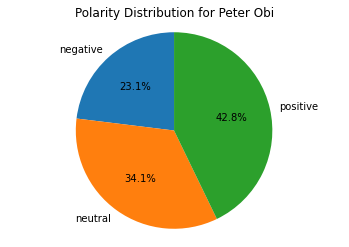

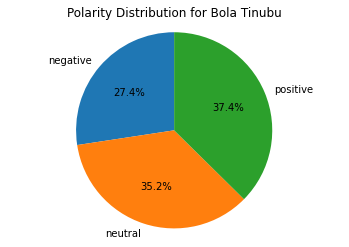

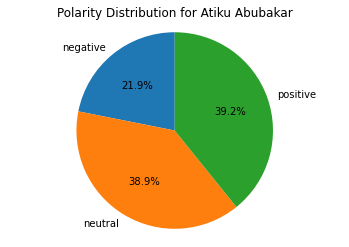

In [13]:
# Assuming you have a dataframe named 'df' with columns 'Candidate' and 'vader_polarity'

# Group the dataframe by 'Candidate' and 'vader_polarity' and count the occurrences
polarity_counts = new_data.groupby(['Candidate', 'vader_polarity']).size().reset_index(name='Count')

# Iterate through each candidate
for candidate in new_data['Candidate'].unique():
    # Filter the polarity counts for the current candidate
    candidate_polarity_counts = polarity_counts[polarity_counts['Candidate'] == candidate]
    
    # Extract the polarity labels and counts for the current candidate
    polarities = candidate_polarity_counts['vader_polarity']
    counts = candidate_polarity_counts['Count']
    
    # Create a pie chart
    fig, ax = plt.subplots()
    ax.pie(counts, labels=polarities, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Polarity Distribution for {candidate}')
    ax.axis('equal')
    
    # Display the pie chart
    plt.show()


Observation:
    
- Peter Obi


Positive Polarity: 42.8%

Negative Polarity: 23.1%

Neutral Polarity: 34.1%

Peter Obi received the highest positive polarity score among the candidates, indicating a relatively more positive sentiment associated with him. However, it is worth noting that his neutral polarity score was the lowest, suggesting a lack of neutrality in the sentiment towards him.
Atiku Abubakar:

- Atiku Abubakar


Positive Polarity: 21.9%

Negative Polarity: 27.4%

Neutral Polarity: 38.9%

Atiku Abubakar obtained the highest neutral polarity score, suggesting a relatively more neutral sentiment associated with him. Additionally, his negative polarity score was the lowest among the candidates, indicating a relatively lower negative sentiment towards him.

- Bola Tinubu


Positive Polarity: 39.2%

Negative Polarity: 27.4%

Neutral Polarity: 35.2%

Bola Tinubu received the highest negative polarity scores, indicating a relatively higher negative sentiment associated with him. On the other hand, his positive polarity score was the least among the candidates, suggesting a lower positive sentiment towards him.

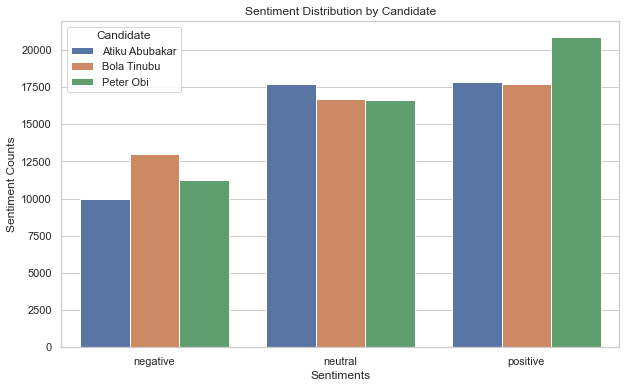

In [16]:
polarity_counts = new_data.groupby(['Candidate', 'vader_polarity']).size().reset_index(name='Count')

# Create a grouped bar chart
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=polarity_counts, x='vader_polarity', y='Count', hue='Candidate')

# Set labels and title
plt.xlabel('Sentiments')
plt.ylabel('Sentiment Counts')
plt.title('Sentiment Distribution by Candidate')

# Show the legend
plt.legend(title='Candidate')

# Display the bar chart
plt.show()


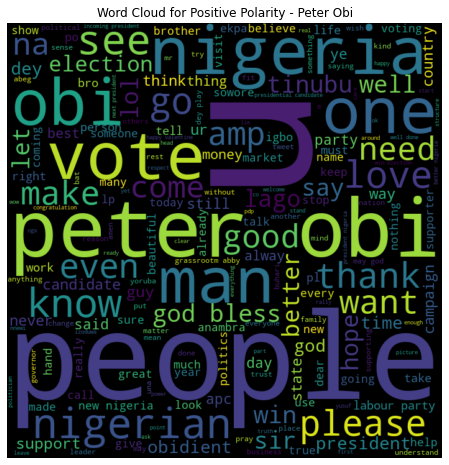

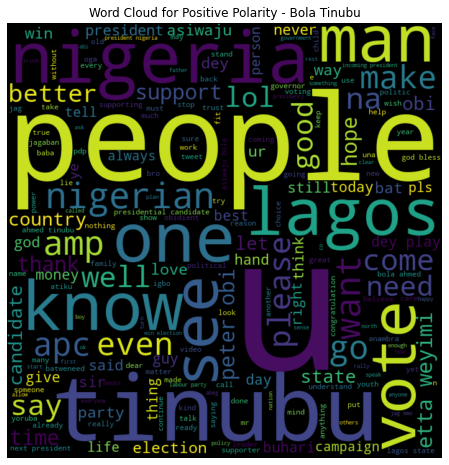

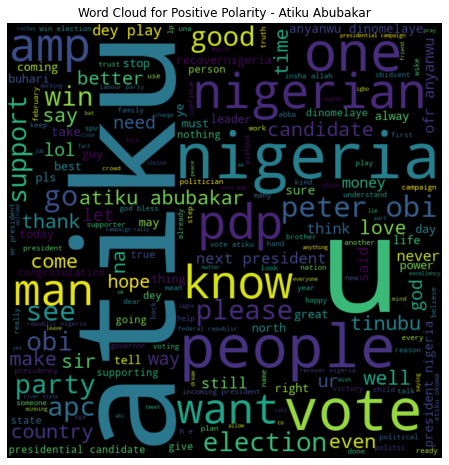

In [14]:


# Generating Positive Word Cloud for each Candidate

# Iterate through each candidate
for candidate in new_data['Candidate'].unique():
    # Filter the dataframe for the current candidate and positive polarity
    candidate_positive_texts = new_data[(new_data['Candidate'] == candidate) & (new_data['vader_polarity'] == 'positive')]['preprocessed_tweet']
    
    # Concatenate the filtered texts into a single string
    text = ' '.join(candidate_positive_texts)
    
    # Generate the word cloud
    wordcloud = WordCloud(width=700, height=700).generate(text)
    
    # Create a plot and display the word cloud
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Positive Polarity - {candidate}')
    plt.axis('off')
    plt.show()


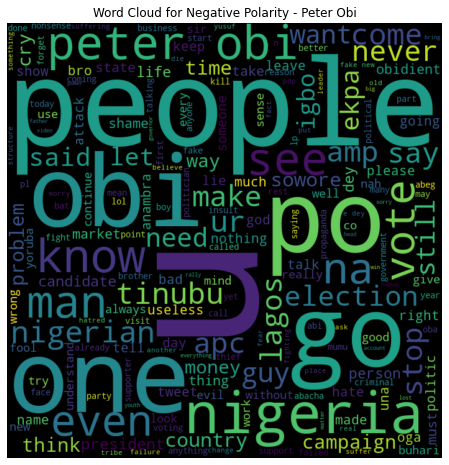

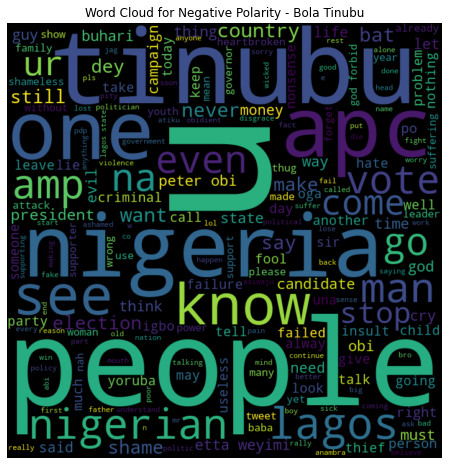

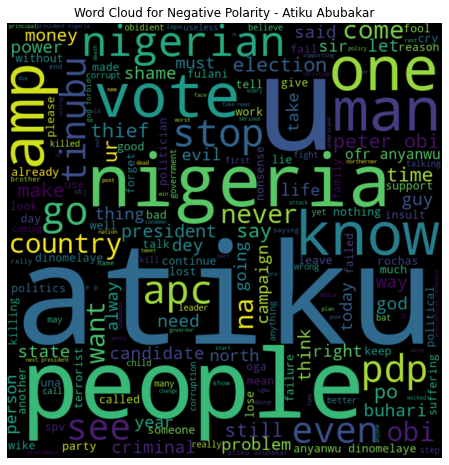

In [15]:
# Generating Negative Word Cloud for each Candidate

# Iterate through each candidate
for candidate in new_data['Candidate'].unique():
    # Filter the dataframe for the current candidate and positive polarity
    candidate_positive_texts = new_data[(new_data['Candidate'] == candidate) & (new_data['vader_polarity'] == 'negative')]['preprocessed_tweet']
    
    # Concatenate the filtered texts into a single string
    text = ' '.join(candidate_positive_texts)
    
    # Generate the word cloud
    wordcloud = WordCloud(width=700, height=700).generate(text)
    
    # Create a plot and display the word cloud
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Negative Polarity - {candidate}')
    plt.axis('off')
    plt.show()
